langkah langkah membangun model dengan kmeans : 

1. Pemahaman Masalah:
Pertama-tama, pahami dengan baik masalah yang ingin Anda selesaikan. Apa tujuan Anda dalam menerapkan algoritma K-Means? Apakah Anda ingin mengelompokkan data atau menemukan pola tersembunyi di dalamnya?
2. Pemilihan Data: 
Siapkan data yang akan digunakan untuk analisis. Pastikan data tersebut bersih, relevan, dan sesuai dengan tujuan analisis Anda.

3. Pra-Pemrosesan Data: 
Lakukan pra-pemrosesan data seperti pemfilteran, normalisasi, atau pengurangan dimensi jika diperlukan. K-Means bekerja dengan baik pada data yang terstandarisasi dan tidak memiliki outlier yang signifikan.

4. Pemilihan Jumlah Klaster: 
Tentukan jumlah klaster yang optimal untuk data Anda. Anda bisa menggunakan metode seperti "elbow method" atau "silhouette method" untuk membantu Anda menentukan jumlah klaster yang sesuai.

5. Inisialisasi Pusat Klaster: 
Mulailah dengan menginisialisasi pusat klaster. Ini dapat dilakukan secara acak atau menggunakan metode yang lebih canggih seperti "k-means++".

6. Pengelompokan Data: 
Lakukan pengelompokan data dengan menggunakan algoritma K-Means. Ini melibatkan iterasi di mana setiap titik data ditempatkan dalam klaster terdekat dengan pusat klaster.

7. Perubahan Pusat Klaster: 
Hitung pusat klaster baru berdasarkan titik-titik data yang termasuk dalam setiap klaster. Ini dilakukan untuk setiap iterasi hingga konvergensi.


8. Evaluasi Model: 
Evaluasi kualitas pengelompokan Anda menggunakan metrik seperti WCSS (Within-Cluster Sum of Squares) atau eksternal seperti indeks Davies–Bouldin.

9. Visualisasi Hasil: 
Visualisasikan hasil pengelompokan Anda, baik dalam bentuk plot klaster atau visualisasi lainnya, untuk memahami pola atau karakteristik data.

10. Iterasi dan Pemrosesan Lanjutan: 
Lakukan iterasi, modifikasi, atau pemrosesan lanjutan sesuai kebutuhan untuk meningkatkan kualitas pengelompokan A
nda.

11. Interpretasi dan Komunikasi Hasil: 
Terakhir, interpretasikan hasil Anda dan komunikasikan temuan Anda kepada orang lain, baik dalam bentuk laporan, presentasi, atau tindakan lanjutan.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('/kaggle/input/mall-data/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# fingsing the number of rows and columns
df.shape

(200, 5)

In [4]:
df['Age'].unique()

array([19, 21, 20, 23, 31, 22, 35, 64, 30, 67, 58, 24, 37, 52, 25, 46, 54,
       29, 45, 40, 60, 53, 18, 49, 42, 36, 65, 48, 50, 27, 33, 59, 47, 51,
       69, 70, 63, 43, 68, 32, 26, 57, 38, 55, 34, 66, 39, 44, 28, 56, 41])

In [5]:
df['Annual Income (k$)'].unique()

array([ 15,  16,  17,  18,  19,  20,  21,  23,  24,  25,  28,  29,  30,
        33,  34,  37,  38,  39,  40,  42,  43,  44,  46,  47,  48,  49,
        50,  54,  57,  58,  59,  60,  61,  62,  63,  64,  65,  67,  69,
        70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  81,  85,  86,
        87,  88,  93,  97,  98,  99, 101, 103, 113, 120, 126, 137])

In [6]:
df['Spending Score (1-100)'].unique()

array([39, 81,  6, 77, 40, 76, 94,  3, 72, 14, 99, 15, 13, 79, 35, 66, 29,
       98, 73,  5, 82, 32, 61, 31, 87,  4, 92, 17, 26, 75, 36, 28, 65, 55,
       47, 42, 52, 60, 54, 45, 41, 50, 46, 51, 56, 59, 48, 49, 53, 44, 57,
       58, 43, 91, 95, 11,  9, 34, 71, 88,  7, 10, 93, 12, 97, 74, 22, 90,
       20, 16, 89,  1, 78, 83, 27, 63, 86, 69, 24, 68, 85, 23,  8, 18])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
# checking missing values
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Choose Annual Income and spending score

In [9]:
X = df.iloc[:,[3,4]].values

In [10]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

Choosing the number of clutser

WCSS - > wiht clusters sum of square

In [11]:
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=1)
    kmeans.fit(X)
    
    wcss.append(kmeans.inertia_)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

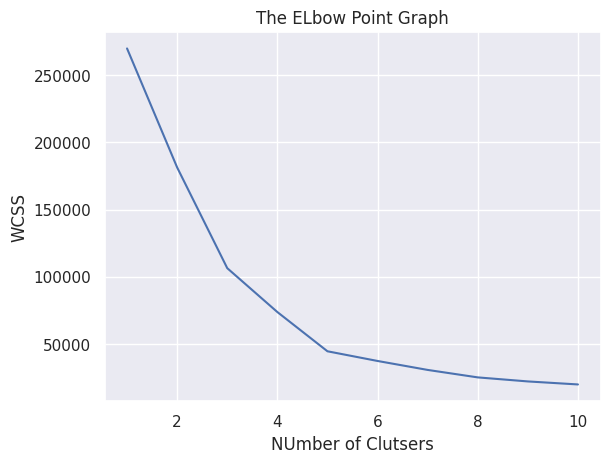

In [12]:
# plot an elbow graph

sns.set()
plt.plot(range(1,11), wcss)
plt.title('The ELbow Point Graph')
plt.xlabel('NUmber of Clutsers')
plt.ylabel('WCSS')
plt.show()

Optimum number of cluster = 5

Jumlah klaster 5 dipilih karena pada titik ini, penurunan WCSS menjadi kurang signifikan. Ini berarti bahwa dengan menggunakan 5 klaster, kita dapat memahami variasi dalam data dengan cukup baik tanpa perlu menambah kompleksitas model lebih lanjut

Training the k means clustering model

In [13]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=1)

In [14]:
y = kmeans.fit_predict(X)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [15]:
y

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 2,
       4, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1, 3, 2, 3, 1, 3, 1, 3,
       2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3], dtype=int32)

Visualisasion all the clutser

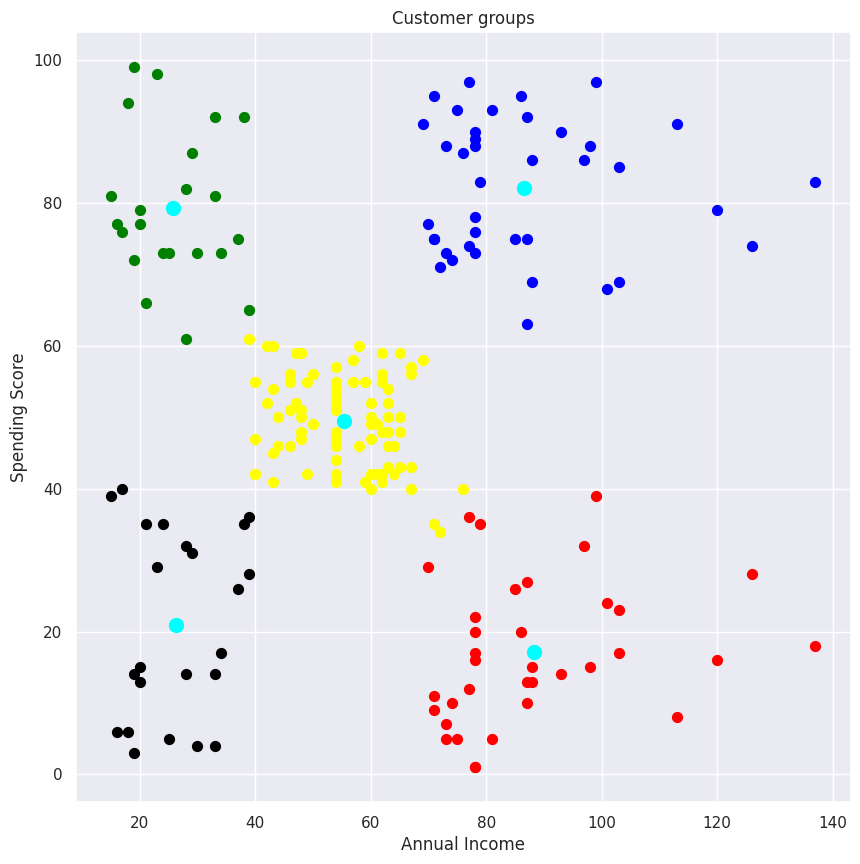

In [16]:
# plotting all the cluster and their controids

plt.figure(figsize=(10,10))
plt.scatter(X[y==0,0], X[y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[y==1,0], X[y==1,1],s=50, c='red', label='Cluster 2')
plt.scatter(X[y==2,0], X[y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X[y==3,0], X[y==3,1], s=50, c='blue', label='Cluster 4')
plt.scatter(X[y==4,0], X[y==4,1], s=50, c='black', label='Cluster 5')



# ploot the centroid 
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')
plt.title('Customer groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

Data Analys